In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


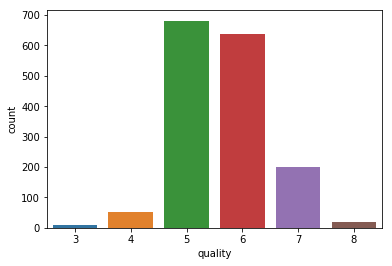

In [5]:
sns.countplot(data['quality'])
plt.show()

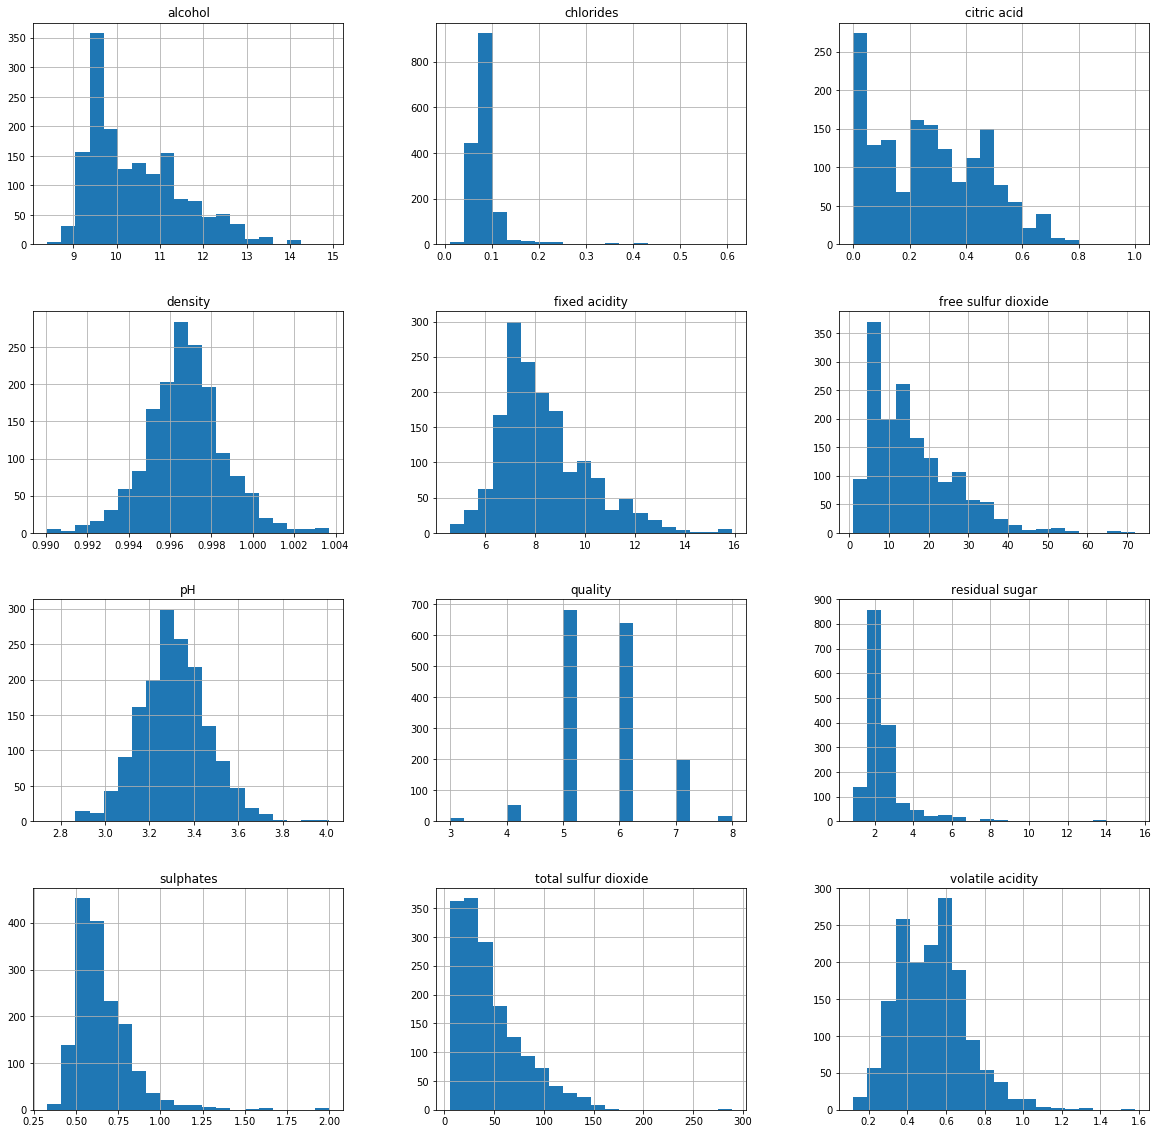

In [6]:
data.hist(bins = 20, figsize = (20, 20))
plt.show()

In [7]:
z_scores = scipy.stats.zscore(data)
filtered_entries = (np.abs(z_scores) < 5).all(axis=1)
data = data[filtered_entries]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,8.317715,0.528383,0.265950,2.464987,0.082637,15.717587,45.666881,0.996719,3.316393,0.647150,10.443036,5.641849
std,1.752651,0.177769,0.191775,1.066407,0.025365,10.239842,31.521324,0.001862,0.150868,0.139792,1.063903,0.807062
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995585,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996720,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,61.000000,0.997820,3.400000,0.720000,11.100000,6.000000
max,15.900000,1.330000,0.790000,9.000000,0.270000,68.000000,165.000000,1.003200,4.010000,1.360000,14.900000,8.000000


In [10]:
len(data)

1558

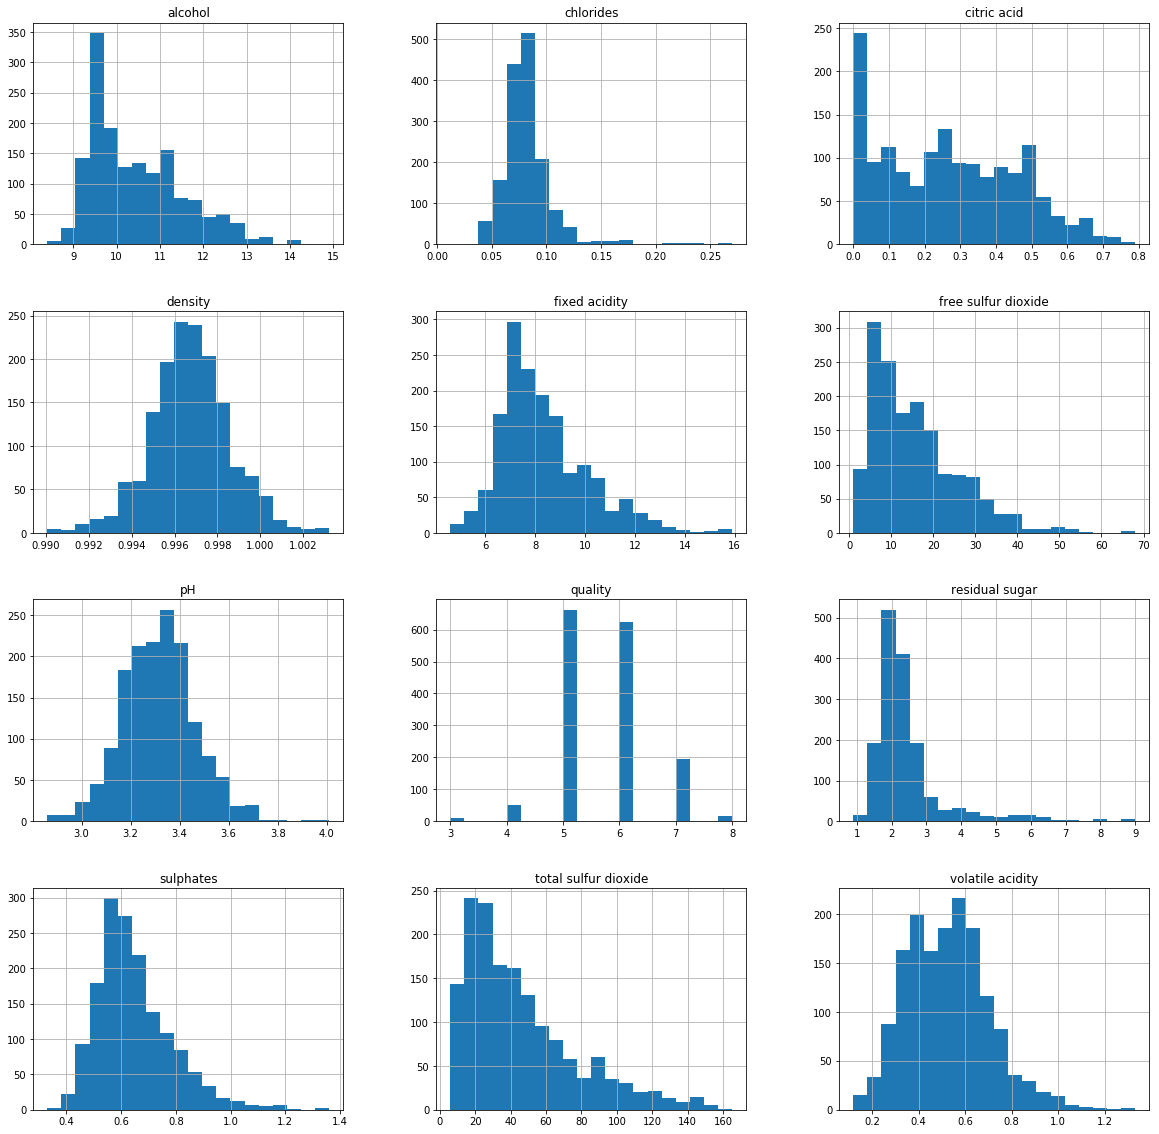

In [11]:
data.hist(bins = 20, figsize = (20, 20))
plt.show()

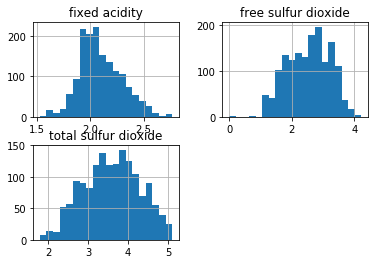

In [12]:
np.log(data[['fixed acidity', 'total sulfur dioxide', 'free sulfur dioxide']]).hist(bins = 20)
plt.show()

In [13]:
data_new = data.copy()
transf_columns = ['fixed acidity', 'total sulfur dioxide', 'free sulfur dioxide']
data_new[transf_columns] = np.log(data_new[transf_columns])
y = data_new['quality']
x = data_new.drop('quality', axis = 1)

In [14]:
x = (x - x.mean()) / x.std()

In [15]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.480087,0.965395,-1.386782,-0.529804,-0.261672,-0.205122,-0.088208,0.580448,1.283285,-0.623428,-0.980386
1,-0.217556,1.977944,-1.386782,0.126605,0.605660,0.996040,0.881440,0.043264,-0.771485,0.234991,-0.604412
2,-0.217556,1.302911,-1.178204,-0.154713,0.369115,0.248660,0.573093,0.150701,-0.373788,0.020386,-0.604412
3,1.586672,-1.397219,1.533308,-0.529804,-0.301097,0.431784,0.723702,0.687885,-1.036617,-0.480358,-0.604412
4,-0.480087,0.965395,-1.386782,-0.529804,-0.261672,-0.205122,-0.088208,0.580448,1.283285,-0.623428,-0.980386


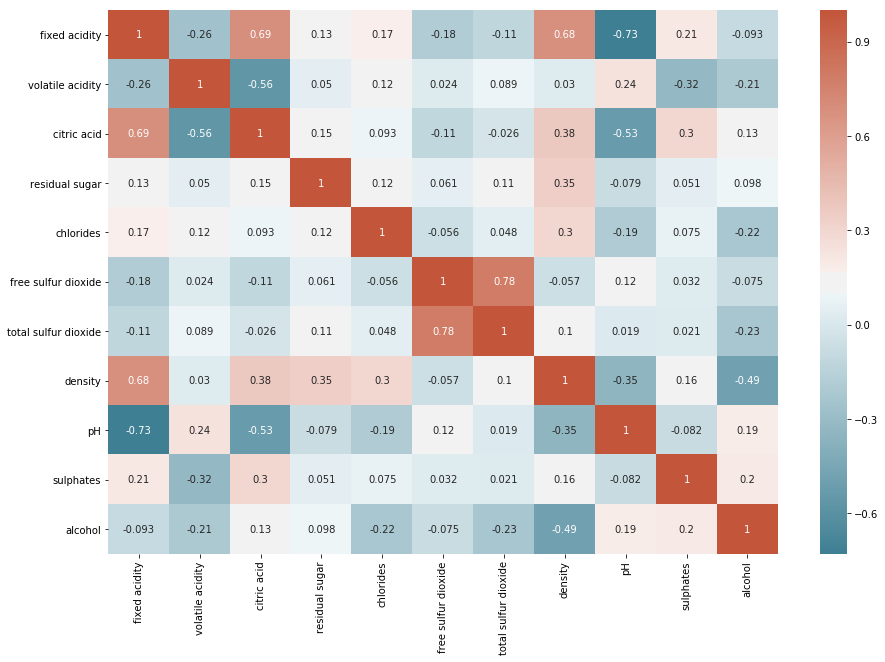

In [16]:
corr = x.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [17]:
x_ols = sm.add_constant(x)
ols = sm.OLS(y, x_ols)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     82.38
Date:                Sun, 26 Sep 2021   Prob (F-statistic):          2.98e-146
Time:                        17:55:10   Log-Likelihood:                -1516.9
No. Observations:                1558   AIC:                             3058.
Df Residuals:                    1546   BIC:                             3122.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6418      0.016    346.284      0.000       5.610       5.674
fixed acidity            0.0730      0.047      1.548      0.122      -0.020       0.166
volatile acidity        -0.1843      0.022     -8.414      0.000      -0.227      -0.141
citric acid             -0.0578      0.028     -2.030      0.042      -0.114      -0.002
residual sugar           0.0042      0.021      0.200      0.842      -0.037       0.045
chlorides               -0.0427      0.018     -2.412      0.016      -0.077      -0.008
free sulfur dioxide      0.0613      0.028      2.202      0.028       0.007       0.116
total sulfur dioxide    -0.0983      0.029     -3.391      0.001      -0.155      -0.041
density                 -0.0461      0.042     -1.098      0.272      -0.128       0.036
pH                      -0.0584      0.030     -1.916      0.056      -0.118       0.001
sulphates                0.1715      0.019      9.247      0.000       0.135       0.208
alcohol                  0.2904      0.028     10.326      0.000       0.235       0.346
==============================================================================
Omnibus:                       25.943   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.648
Skew:                          -0.144   Prob(JB):                     1.49e-09
Kurtosis:                       3.737   Cond. No.                         7.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y = y.apply(lambda x: 0 if x <= 5 else 1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix

logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_predict = logReg.predict(x_test)

print(accuracy_score(y_test, y_predict))

print(classification_report(y_true = y_test, y_pred = y_predict))

confusion_matrix(y_test, y_predict)

0.732905982906
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       199
           1       0.79      0.73      0.76       269

    accuracy                           0.73       468
   macro avg       0.73      0.73      0.73       468
weighted avg       0.74      0.73      0.73       468



array([[146,  53],
       [ 72, 197]], dtype=int64)

In [34]:
y_insample = logReg.predict(x_train)
print(accuracy_score(y_train, y_insample))

0.759633027523


In [21]:
pd.DataFrame({'features': x.columns, 'importance': logReg.coef_[0]}).sort_values(by = ['importance'], ascending = False)

,features,importance
10,alcohol,0.904259
9,sulphates,0.511524
0,fixed acidity,0.376825
5,free sulfur dioxide,0.338840
8,pH,-0.004796
4,chlorides,-0.017497
3,residual sugar,-0.087906
7,density,-0.097282
2,citric acid,-0.315856
6,total sulfur dioxide,-0.579865


In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 300, max_depth = 5)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

print(accuracy_score(y_test, y_pred_rfc))

print(classification_report(y_true = y_test, y_pred = y_pred_rfc))

confusion_matrix(y_test, y_pred_rfc)

0.752136752137
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       199
           1       0.81      0.74      0.78       269

    accuracy                           0.75       468
   macro avg       0.75      0.75      0.75       468
weighted avg       0.76      0.75      0.75       468



array([[152,  47],
       [ 69, 200]], dtype=int64)

In [49]:
y_insample = rfc.predict(x_train)
print(accuracy_score(y_train, y_insample))

0.835779816514


In [23]:
pd.DataFrame({'features': x.columns, 'importance': rfc.feature_importances_}).sort_values(by = ['importance'], ascending = False)

,features,importance
10,alcohol,0.173857
9,sulphates,0.136756
1,volatile acidity,0.122434
6,total sulfur dioxide,0.108578
7,density,0.082653
2,citric acid,0.069261
4,chlorides,0.066518
0,fixed acidity,0.066335
8,pH,0.064160
5,free sulfur dioxide,0.056934


In [28]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
# partial_dependence(rfc, x_train, [1])

plot_partial_dependence(rfc, x_train, ['alcohol'])

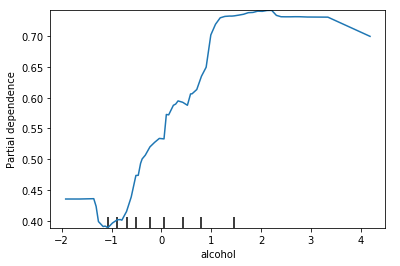

In [29]:
plt.show()

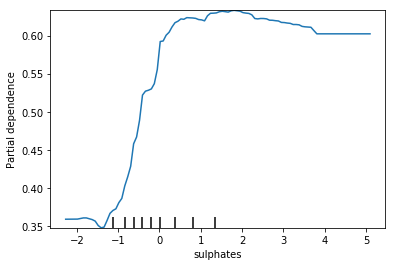

In [31]:
plot_partial_dependence(rfc, x_train, ['sulphates'])
plt.show()

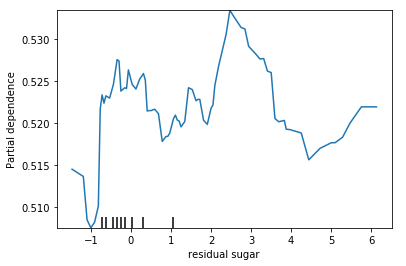

In [32]:
plot_partial_dependence(rfc, x_train, ['residual sugar'])
plt.show()

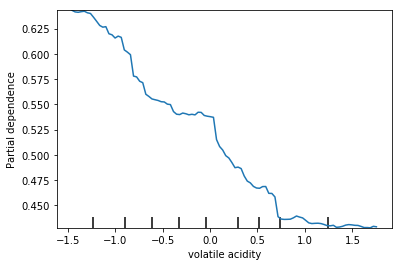

In [33]:
plot_partial_dependence(rfc, x_train, ['volatile acidity'])
plt.show()

In [117]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print(accuracy_score(y_test, y_pred_svc))

print(classification_report(y_true = y_test, y_pred = y_pred_svc))

0.737179487179
             precision    recall  f1-score   support

          0       0.67      0.74      0.71       199
          1       0.79      0.73      0.76       269

avg / total       0.74      0.74      0.74       468



In [83]:
sum(y) / len(y)

0.53722721437740695

In [84]:
rfc.feature_importances_

array([ 0.06344626,  0.12684931,  0.07033767,  0.05470082,  0.06873483,
        0.05486641,  0.10498453,  0.0869188 ,  0.0671358 ,  0.13139768,
        0.17062789])

In [121]:
pd.DataFrame({'features': x.columns, 'importance': rfc.feature_importances_}).sort_values(by = ['importance'], ascending = False)

,features,importance
10,alcohol,0.171736
9,sulphates,0.144216
6,total sulfur dioxide,0.115447
1,volatile acidity,0.113937
7,density,0.085736
2,citric acid,0.071354
4,chlorides,0.069077
8,pH,0.065061
0,fixed acidity,0.059942
5,free sulfur dioxide,0.053160


In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print(accuracy_score(y_test, y_pred_dt))

print(classification_report(y_true = y_test, y_pred = y_pred_dt))

0.696581196581
              precision    recall  f1-score   support

           0       0.67      0.57      0.61       199
           1       0.71      0.79      0.75       269

    accuracy                           0.70       468
   macro avg       0.69      0.68      0.68       468
weighted avg       0.69      0.70      0.69       468



In [79]:
pd.DataFrame({'features': x.columns, 'importance': dt.feature_importances_}).sort_values(by = ['importance'], ascending = False)

,features,importance
10,alcohol,0.537008
9,sulphates,0.229621
6,total sulfur dioxide,0.165088
1,volatile acidity,0.068284
0,fixed acidity,0.000000
2,citric acid,0.000000
3,residual sugar,0.000000
4,chlorides,0.000000
5,free sulfur dioxide,0.000000
7,density,0.000000


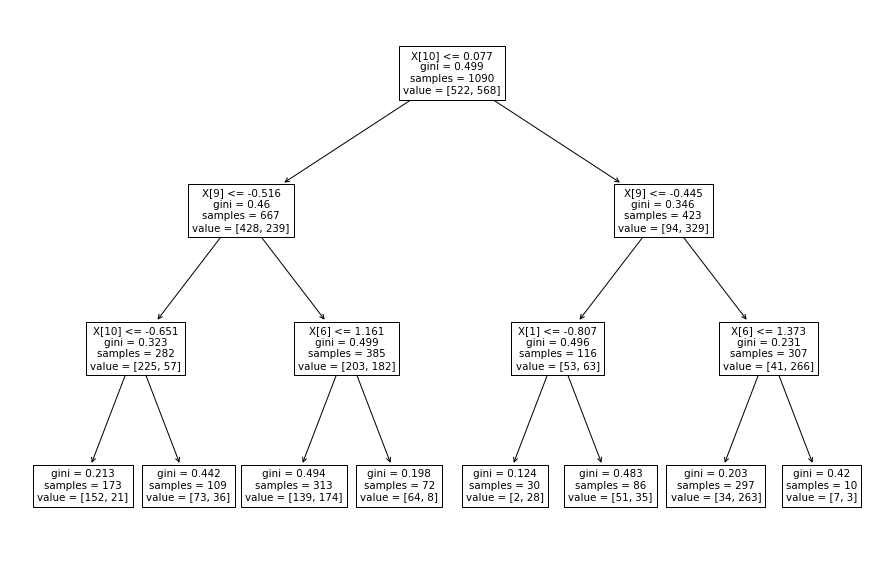

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.subplots(figsize=(15,10))
tree.plot_tree(dt)
plt.show()

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=2)
gbc.fit(x_train,y_train)
y_pred_gbc = gbc.predict(x_test)

print(accuracy_score(y_test, y_pred_gbc))

print(classification_report(y_true = y_test, y_pred = y_pred_gbc))

0.773504273504
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       199
           1       0.82      0.78      0.80       269

    accuracy                           0.77       468
   macro avg       0.77      0.77      0.77       468
weighted avg       0.78      0.77      0.77       468



In [88]:
pd.DataFrame({'features': x.columns, 'importance': gbc.feature_importances_}).sort_values(by = ['importance'], ascending = False)

,features,importance
10,alcohol,0.302117
9,sulphates,0.147367
6,total sulfur dioxide,0.116818
1,volatile acidity,0.111854
7,density,0.062829
8,pH,0.060969
0,fixed acidity,0.057489
2,citric acid,0.046462
4,chlorides,0.046334
5,free sulfur dioxide,0.027656


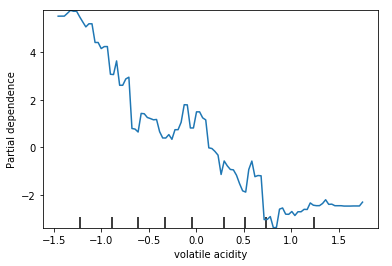

In [58]:
plot_partial_dependence(gbc, x_train, ['volatile acidity'])
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 0.2, 0.5]}
gbc = GradientBoostingClassifier(max_depth=5)
gridSearch = GridSearchCV(gbc, parameters, cv = 5)
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(max_depth=5),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'n_estimators': [50, 100, 150, 200]})

In [60]:
gridSearch.cv_results_

{'mean_fit_time': array([ 0.57317138,  1.23696775,  1.97629046,  2.47871838,  0.58410673,
         1.03566203,  1.55559316,  2.136305  ,  0.51993904,  1.04887419,
         1.66414843,  1.98871341]),
 'mean_score_time': array([ 0.00538692,  0.00777707,  0.00939426,  0.01037135,  0.00558519,
         0.00638361,  0.00718122,  0.00678129,  0.00658231,  0.00778012,
         0.00748405,  0.01057172]),
 'mean_test_score': array([ 0.80275229,  0.80642202,  0.80550459,  0.80917431,  0.80458716,
         0.81100917,  0.8       ,  0.79908257,  0.79449541,  0.78807339,
         0.79449541,  0.79266055]),
 'param_learning_rate': masked_array(data = [0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.5 0.5 0.5 0.5],
              mask = [False False False False False False False False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [50 100 150 200 50 100 150 200 50 100 150 200],
              mask = [False False False False False False False False False False False Fals

In [61]:
gridSearch.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [62]:
gbc_best = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.2, max_depth=5)
gbc_best.fit(x_train, y_train)

y_pred_gbc_best = gbc_best.predict(x_test)

print(accuracy_score(y_test, y_pred_gbc_best))

print(classification_report(y_true = y_test, y_pred = y_pred_gbc_best))

0.799145299145
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       199
           1       0.82      0.83      0.83       269

    accuracy                           0.80       468
   macro avg       0.79      0.79      0.79       468
weighted avg       0.80      0.80      0.80       468



In [63]:
pd.DataFrame({'features': x.columns, 'importance': gbc_best.feature_importances_}).sort_values(by = ['importance'], ascending = False)

,features,importance
10,alcohol,0.269982
9,sulphates,0.128407
1,volatile acidity,0.122077
6,total sulfur dioxide,0.117458
7,density,0.063203
8,pH,0.062806
4,chlorides,0.056185
2,citric acid,0.055198
0,fixed acidity,0.052600
5,free sulfur dioxide,0.036715


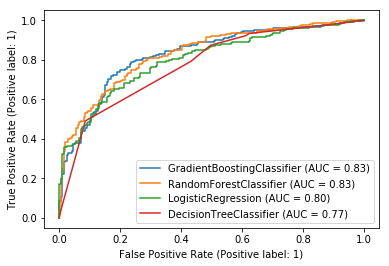

In [94]:
from sklearn.metrics import plot_roc_curve
gbc_disp = plot_roc_curve(gbc, x_test, y_test)
plot_roc_curve(rfc, x_test, y_test, ax=gbc_disp.ax_)
plot_roc_curve(logReg, x_test, y_test, ax=gbc_disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax=gbc_disp.ax_)
plt.show()